In [1]:
cd ../backprop

/Users/darioml/src/fyp/backprop


In [2]:
%pylab inline
from scipy_optim import NN_1HL
import numpy as np
from scipy_optim import NN_1HL
from sklearn import cross_validation
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from pprint import pprint

In [3]:
f = open('../data/handwriting_16x16_0_1.txt', 'rU')
out_data = []
out_label= []
for line in f:
    raw   = line.rstrip().split(' ')
    data  = raw[:256]
    labels= np.array(raw[256:], int)
    label = np.where(labels==1)[0][0]

    out_label.append(label)
    # out_data.append([np.array(data, float), labels]);
    out_data.append(np.array(data, float));
    

out_data = np.array(out_data)
out_label= np.array(out_label, 'uint8')
    
X_train, X_test, y_train, y_test = cross_validation.train_test_split(out_data, out_label, test_size=0.4)


# plt.imshow( np.resize(out_data[10] ,(16,16)) ) #Needs to be in row,col order
# plt.show()
# plt.imshow( np.resize(out_data[1000] ,(16,16)) ) #Needs to be in row,col order
# plt.show()
# plt.imshow( np.resize(out_data[1592] ,(16,16)) ) #Needs to be in row,col order
# plt.show()

In [67]:
import time

results = []
hidden_size = [2, 4, 8, 15, 19, 25, 32] # 
times = []

for i in hidden_size:
    nn = NN_1HL(maxiter=200, hidden_layer_size=i)
    
    time_now = time.time()
    nn.fit(X_train, y_train)
    times.append( time.time() - time_now )
    
    results.append(accuracy_score(y_test, nn.predict(X_test)))

Populating the interactive namespace from numpy and matplotlib


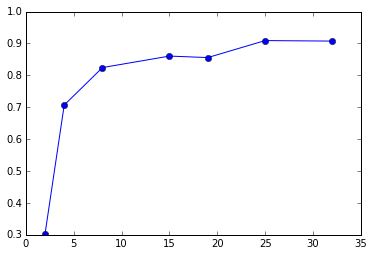

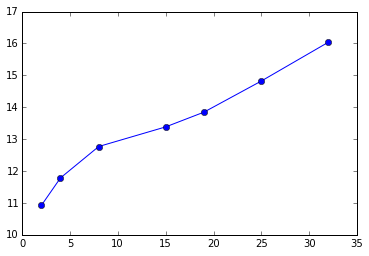

In [68]:
%pylab inline


plt.plot( hidden_size,results, 'o-') #Needs to be in row,col order
plt.show()

plt.plot( hidden_size,times, 'o-') #Needs to be in row,col order
plt.show()

In [69]:
hidden_size = [1, 2, 4, 6, 8, 12, 16, 22, 25, 32, 45, 60]
#hidden_size = [1, 2, 4]
repeats = 50

results = np.zeros((len(hidden_size),repeats), float)
times = np.zeros((len(hidden_size),repeats), float)

for i in range(len(hidden_size)):
    for j in range(repeats):
        nn = NN_1HL(hidden_layer_size=hidden_size[i], maxiter=200)

        time_now = time.time()
        nn.fit(X_train, y_train)
        times[i,j] = time.time() - time_now

        results[i,j] = accuracy_score(y_test, nn.predict(X_test))


scipy_optim.py:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
scipy_optim.py:67: RuntimeWarning: divide by zero encountered in log
  costPositive = -Y * np.log(h).T
scipy_optim.py:67: RuntimeWarning: invalid value encountered in multiply
  costPositive = -Y * np.log(h).T


Populating the interactive namespace from numpy and matplotlib


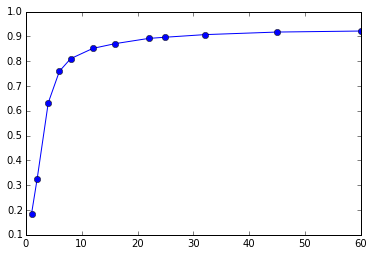

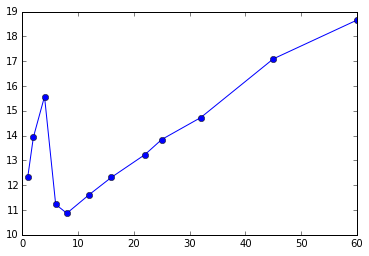

In [71]:
%pylab inline


plt.plot( hidden_size,np.mean(results,1), 'o-') #Needs to be in row,col order
plt.show()

plt.plot( hidden_size,np.mean(times,1), 'o-') #Needs to be in row,col order
plt.show()


Populating the interactive namespace from numpy and matplotlib


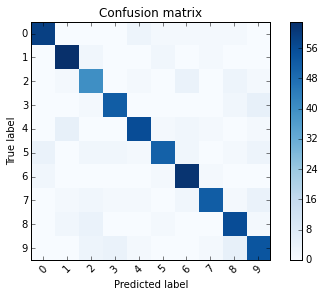

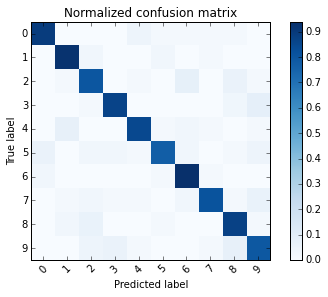

In [17]:
%pylab inline

import time
from scipy_optim import NN_1HL
import numpy as np
from scipy_optim import NN_1HL
from sklearn import cross_validation
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
from pprint import pprint


# X_train, X_test, y_train, y_test = cross_validation.train_test_split(out_data, out_label, test_size=0.4)

# nn = NN_1HL(maxiter=200, hidden_layer_size=20)
# nn.fit(X_train, y_train)
# y_pred = nn.predict(X_test)


def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(10)
    plt.xticks(tick_marks, range(10), rotation=45)
    plt.yticks(tick_marks, range(10))
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Compute confusion matrix
confmat = confusion_matrix(y_test, y_pred)
plt.figure()
plot_confusion_matrix(confmat)

cm_normalized = confmat.astype('float') / confmat.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')



In [32]:
from PIL import Image
from os import listdir
from os.path import isfile, join
import numpy as np
import scipy.io

mypath = '../data/ball'
onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) and f.endswith('.png')]



data = np.zeros((len(onlyfiles), 16*16))
label= np.zeros(len(onlyfiles))

idx = 0;

for file in onlyfiles:
    
    im = Image.open('../data/ball/' + file)
    pixels = []
    for y in range(im.size[1]):
        for x in range(im.size[0]):
            pixels.append(im.getpixel((x,y)))

    data[idx,:] = pixels

    if file.startswith('16x16_bottom_to_top'):
        label[idx] = 0
    if file.startswith('16x16_left_to_right'):
        label[idx] = 1
    if file.startswith('16x16_right_to_left'):
        label[idx] = 2
    if file.startswith('16x16_top_to_bottom'):
        label[idx] = 3
        
    idx += 1

scipy.io.savemat('../data/ball/test.mat', {'X': data, 'Y':label})

In [54]:
from scipy_optim import NN_1HL
import numpy as np
from scipy_optim import NN_1HL
from sklearn import cross_validation
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from pprint import pprint
import scipy.io

data_file = scipy.io.loadmat('../data/ball/test.mat')

data = np.array(data_file['X'])
labels = np.array(data_file['Y'], 'uint8').T

X_train, X_test, y_train, y_test = cross_validation.train_test_split(data, labels.flatten(), test_size=0.4)

(974,)


Populating the interactive namespace from numpy and matplotlib


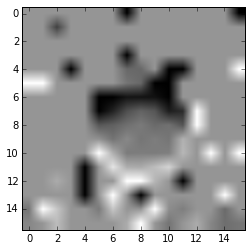

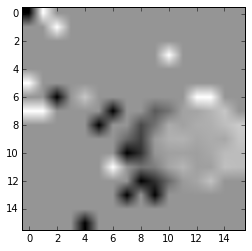

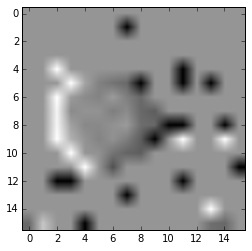

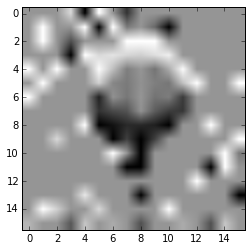

In [45]:
%pylab inline
from matplotlib import cm


plt.imshow( np.resize(data[10] ,(16,16)) , cmap = cm.Greys_r) #Needs to be in row,col order
plt.show()
plt.imshow( np.resize(data[400] ,(16,16)) , cmap = cm.Greys_r) #Needs to be in row,col order
plt.show()
plt.imshow( np.resize(data[1000] ,(16,16)), cmap = cm.Greys_r ) #Needs to be in row,col order
plt.show()
plt.imshow( np.resize(data[1500] ,(16,16)) , cmap = cm.Greys_r) #Needs to be in row,col order
plt.show()

In [59]:
import time

results = []
hidden_size = [2, 4, 8, 15, 19, 25, 32]
times = []

for i in hidden_size:
    nn = NN_1HL(maxiter=200, hidden_layer_size=i)
    
    time_now = time.time()
    nn.fit(X_train, y_train)
    times.append( time.time() - time_now )
    
    results.append(accuracy_score(y_test, nn.predict(X_test)))

2
4
8
15
19
25
32


Populating the interactive namespace from numpy and matplotlib


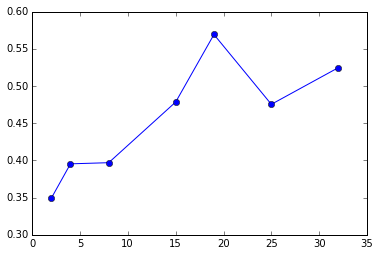

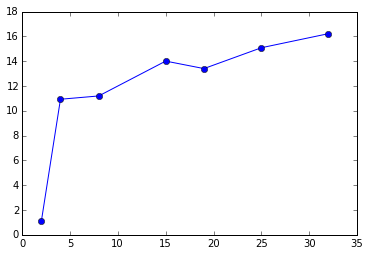

In [60]:
%pylab inline

plt.plot( hidden_size,results, 'o-') #Needs to be in row,col order
plt.show()

plt.plot( hidden_size,times, 'o-') #Needs to be in row,col order
plt.show()

In [61]:
hidden_size = [1, 2, 4, 6, 8, 12, 16, 22, 25, 32, 45, 60]
#hidden_size = [1, 2, 4]
repeats = 50

results = np.zeros((len(hidden_size),repeats), float)
times = np.zeros((len(hidden_size),repeats), float)

for i in range(len(hidden_size)):
    for j in range(repeats):
        nn = NN_1HL(hidden_layer_size=hidden_size[i], maxiter=200)

        time_now = time.time()
        nn.fit(X_train, y_train)
        times[i,j] = time.time() - time_now

        results[i,j] = accuracy_score(y_test, nn.predict(X_test))

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
6
6
6
6
6

scipy_optim.py:69: RuntimeWarning: divide by zero encountered in log
  costNegative = (1 - Y) * np.log(1 - h).T
scipy_optim.py:69: RuntimeWarning: invalid value encountered in multiply
  costNegative = (1 - Y) * np.log(1 - h).T
scipy_optim.py:68: RuntimeWarning: divide by zero encountered in log
  costPositive = -Y * np.log(h).T



6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45

scipy_optim.py:68: RuntimeWarning: invalid value encountered in multiply
  costPositive = -Y * np.log(h).T


In [6]:
%pylab inline


plt.plot( hidden_size,np.mean(results,1), 'o-') #Needs to be in row,col order
plt.show()

plt.plot( hidden_size,np.mean(times,1), 'o-') #Needs to be in row,col order
plt.show()



Populating the interactive namespace from numpy and matplotlib


NameError: name 'hidden_size' is not defined

In [63]:
%pylab inline

import time
from scipy_optim import NN_1HL
import numpy as np
from scipy_optim import NN_1HL
from sklearn import cross_validation
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
from pprint import pprint


# X_train, X_test, y_train, y_test = cross_validation.train_test_split(out_data, out_label, test_size=0.4)

# nn = NN_1HL(maxiter=200, hidden_layer_size=20)
# nn.fit(X_train, y_train)
# y_pred = nn.predict(X_test)


def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(10)
    plt.xticks(tick_marks, range(10), rotation=45)
    plt.yticks(tick_marks, range(10))
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Compute confusion matrix
confmat = confusion_matrix(y_test, y_pred)
plt.figure()
plot_confusion_matrix(confmat)

cm_normalized = confmat.astype('float') / confmat.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')




Populating the interactive namespace from numpy and matplotlib


NameError: name 'y_pred' is not defined